In [1]:
import os 
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 
sns.set(rc={'figure.figsize': (8,6)})
%matplotlib inline

#datetime lib:
from pandas import to_datetime
import itertools 
import warnings 
import datetime 
warnings.filterwarnings('ignore')

#SKlearn lib:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor #ok


In [2]:
main = 'C:\\Users\\joaopaulo\\Desktop\\Gla_data\\PP EPC FULL'
gla_file = os.path.join(main, 'final_merge4.csv')
gla_data = pd.read_csv(gla_file)

print(gla_data.shape) #(331654, 29)
gla_data.head()

(871020, 37)


index          county              district       oa11     lsoa11  \
0  1787073  GREATER LONDON              LEWISHAM  E00016638  E01003296   
1  1811124  GREATER LONDON              LEWISHAM  E00016638  E01003296   
2  1870838  GREATER LONDON                MERTON  E00017413  E01003447   
3   359864  GREATER LONDON               BROMLEY  E00003311  E01000683   
4  1630531  GREATER LONDON  KINGSTON UPON THAMES  E00014905  E01002961   

      msoa11  postcode                           ADDRESS        lat      long  \
0  E02000664  SE13 5FP  014 Brick Kiln One, Station Road  51.465100 -0.012095   
1  E02000664  SE13 5FL  036 River Mill One, Station Road  51.465120 -0.012728   
2  E02000704  SW20 0AN                   1, Aboyne Drive  51.408534 -0.243936   
3  E02000161   BR6 9UD                  1, Ambrose Close  51.367211  0.089848   
4  E02000605   KT3 3UY                   1, Bakewell Way  51.410950 -0.260673   

   ...  Fare_Zone  Deprivation_Index  driving_distance_miles  Median(£)-2011  \
0  ...        3.0           5.850052                    5.81        190000.0   
1  ...        3.0           5.850052                    5.81        190000.0   
2  ...        4.0           3.240188                   13.92        210000.0   
3  ...        6.0          -2.300779                   17.67        230000.0   
4  ...        4.0          -2.684785                   14.03        460000.0   

   connec_air_public  connec_air_car  connec_road_car  \
0           0.438756        0.253657         0.434362   
1           0.438756        0.253657         0.434362   
2           0.360948        0.284701         0.447893   
3           0.266449        0.254481         0.464440   
4           0.341132        0.289282         0.447246   

   Gross Domestic Product: Quarter on Quarter growth: CVM SA %  \
0                                                0.3             
1                                                0.7             
2                                                0.5             
3                                                0.6             
4                                                0.7             

   Construction, cont Q on Q yr ago  \
0                             -0.13   
1                             -0.07   
2                              0.16   
3                              0.23   
4                              0.67   

   Real Estate Activities (period on period growth) %:CVM  
0                                                0.5       
1                                               -0.4       
2                                                1.5       
3                                                0.3       
4                                                1.5       

[5 rows x 37 columns]

In [3]:
gla_data.columns

Index(['index', 'county', 'district', 'oa11', 'lsoa11', 'msoa11', 'postcode',
       'ADDRESS', 'lat', 'long', 'property_type', 'new_build', 'duration',
       'category', 'CURRENT_ENERGY_RATING', 'TOTAL_FLOOR_AREA',
       'NUMBER_HABITABLE_ROOMS', 'NUMBER_HEATED_ROOMS',
       'MULTI_GLAZE_PROPORTION', 'WINDOWS_DESCRIPTION', 'PROPERTY_TYPE',
       'BUILT_FORM', 'LODGEMENT_DATE', 'deed_date', 'year', 'quarter',
       'price_paid', 'Fare_Zone', 'Deprivation_Index',
       'driving_distance_miles', 'Median(£)-2011', 'connec_air_public',
       'connec_air_car', 'connec_road_car',
       'Gross Domestic Product: Quarter on Quarter growth: CVM SA %',
       'Construction, cont Q on Q yr ago',
       'Real Estate Activities (period on period growth) %:CVM'],
      dtype='object')

In [4]:
gla_data.isnull().sum()

index                                                               0
county                                                              0
district                                                            0
oa11                                                               24
lsoa11                                                             24
msoa11                                                             24
postcode                                                            0
ADDRESS                                                             0
lat                                                                24
long                                                               24
property_type                                                       0
new_build                                                           0
duration                                                            0
category                                                            0
CURRENT_ENERGY_RATIN

In [5]:
gla_data.dropna(subset=['Fare_Zone', 'Deprivation_Index', 'driving_distance_miles', 'Median(£)-2011', 'NUMBER_HABITABLE_ROOMS', 
                       'NUMBER_HEATED_ROOMS'], inplace=True)
print(gla_data.shape)
##(331654, 29) -> 331643, 29)

(746174, 37)


In [6]:
gla_data.isnull().sum()

index                                                              0
county                                                             0
district                                                           0
oa11                                                               0
lsoa11                                                             0
msoa11                                                             0
postcode                                                           0
ADDRESS                                                            0
lat                                                                0
long                                                               0
property_type                                                      0
new_build                                                          0
duration                                                           0
category                                                           0
CURRENT_ENERGY_RATING             

In [7]:
#Limiting the data:

gla_data2 = gla_data[['property_type', 'new_build', 'duration', 'category',     
       'CURRENT_ENERGY_RATING', 'TOTAL_FLOOR_AREA', 'NUMBER_HABITABLE_ROOMS',
       'NUMBER_HEATED_ROOMS', 'MULTI_GLAZE_PROPORTION', 'WINDOWS_DESCRIPTION',
       'PROPERTY_TYPE', 'BUILT_FORM', 'price_paid', 'Fare_Zone',
       'Deprivation_Index', 'driving_distance_miles', 'Median(£)-2011']]

In [22]:
#Investigate elements within each feature:

for column in gla_data2:
    unique_vals = np.unique(gla_data2[column])
    nr_vals = len(unique_vals)
    if nr_vals <60:
        print('The number of unique values for feature {}: {} - {}'.format(column, nr_vals, unique_vals))
    else:
        print('The number of unique values for feature {}: {}'.format(column, nr_vals))

The number of unique values for feature property_type: 4 - [1. 3. 4. 5.]
The number of unique values for feature new_build: 2 - [0. 1.]
The number of unique values for feature duration: 2 - [0. 1.]
The number of unique values for feature category: 1 - [1.]
The number of unique values for feature CURRENT_ENERGY_RATING: 7 - [1. 2. 3. 4. 5. 6. 7.]
The number of unique values for feature TOTAL_FLOOR_AREA: 26657
The number of unique values for feature NUMBER_HABITABLE_ROOMS: 48 - [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 25. 30. 31. 33. 34. 36. 40. 44. 50. 51. 54. 55.
 57. 58. 60. 67. 69. 72. 80. 83. 85. 87. 97. 99.]
The number of unique values for feature NUMBER_HEATED_ROOMS: 34 - [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 25. 30. 31. 36. 44. 57. 67. 72. 80. 83.]
The number of unique values for feature MULTI_GLAZE_PROPORTION: 101
The number of unique values for feature WINDOWS_DES

In [24]:
#Making categorical variables into numerical representeations:

gla_data3 = pd.get_dummies(gla_data2, columns = ['property_type', 'new_build', 'duration', 'category',     
       'CURRENT_ENERGY_RATING', 'Fare_Zone', 'PROPERTY_TYPE', 'BUILT_FORM'])
       
gla_data3.head()

TOTAL_FLOOR_AREA  NUMBER_HABITABLE_ROOMS  NUMBER_HEATED_ROOMS  \
2             66.00                     3.0                  3.0   
3            137.00                     7.0                  7.0   
4            114.00                     4.0                  4.0   
5             99.07                     4.0                  4.0   
6             99.07                     4.0                  4.0   

   MULTI_GLAZE_PROPORTION  WINDOWS_DESCRIPTION  price_paid  Deprivation_Index  \
2                   100.0                100.0    337000.0           3.240188   
3                   100.0                100.0    657000.0          -2.300779   
4                   100.0                100.0    570000.0          -2.684785   
5                   100.0                100.0    570000.0          -2.432610   
6                   100.0                100.0    770000.0          -2.432610   

   driving_distance_miles  Median(£)-2011  property_type_1.0  ...  \
2                   13.92        210000.0                  0  ...   
3                   17.67        230000.0                  1  ...   
4                   14.03        460000.0                  0  ...   
5                   16.01        374950.0                  1  ...   
6                   16.01        374950.0                  1  ...   

   PROPERTY_TYPE_2.0  PROPERTY_TYPE_3.0  PROPERTY_TYPE_4.0  PROPERTY_TYPE_5.0  \
2                  1                  0                  0                  0   
3                  0                  0                  0                  1   
4                  0                  0                  0                  1   
5                  0                  0                  0                  1   
6                  0                  0                  0                  1   

   BUILT_FORM_0.0  BUILT_FORM_1.0  BUILT_FORM_2.0  BUILT_FORM_3.0  \
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   
5               0               0               0               0   
6               0               0               0               0   

   BUILT_FORM_4.0  BUILT_FORM_5.0  
2               1               0  
3               0               1  
4               1               0  
5               1               0  
6               1               0  

[5 rows x 41 columns]

In [25]:
#Scale Columns, converting raw numbers in scale from zero to one.

scale_vars = ['TOTAL_FLOOR_AREA', 'NUMBER_HABITABLE_ROOMS',
       'NUMBER_HEATED_ROOMS', 'MULTI_GLAZE_PROPORTION', 'WINDOWS_DESCRIPTION',
       'Deprivation_Index', 'driving_distance_miles']

scaler = MinMaxScaler()   
gla_data3[scale_vars] = scaler.fit_transform(gla_data3[scale_vars])
gla_data3.head()

TOTAL_FLOOR_AREA  NUMBER_HABITABLE_ROOMS  NUMBER_HEATED_ROOMS  \
2          0.006046                0.030303             0.036145   
3          0.012611                0.070707             0.084337   
4          0.010484                0.040404             0.048193   
5          0.009103                0.040404             0.048193   
6          0.009103                0.040404             0.048193   

   MULTI_GLAZE_PROPORTION  WINDOWS_DESCRIPTION  price_paid  Deprivation_Index  \
2                     1.0                  1.0    337000.0           0.521189   
3                     1.0                  1.0    657000.0           0.184577   
4                     1.0                  1.0    570000.0           0.161249   
5                     1.0                  1.0    570000.0           0.176568   
6                     1.0                  1.0    770000.0           0.176568   

   driving_distance_miles  Median(£)-2011  property_type_1.0  ...  \
2                0.325843        210000.0                  0  ...   
3                0.413624        230000.0                  1  ...   
4                0.328418        460000.0                  0  ...   
5                0.374766        374950.0                  1  ...   
6                0.374766        374950.0                  1  ...   

   PROPERTY_TYPE_2.0  PROPERTY_TYPE_3.0  PROPERTY_TYPE_4.0  PROPERTY_TYPE_5.0  \
2                  1                  0                  0                  0   
3                  0                  0                  0                  1   
4                  0                  0                  0                  1   
5                  0                  0                  0                  1   
6                  0                  0                  0                  1   

   BUILT_FORM_0.0  BUILT_FORM_1.0  BUILT_FORM_2.0  BUILT_FORM_3.0  \
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   
5               0               0               0               0   
6               0               0               0               0   

   BUILT_FORM_4.0  BUILT_FORM_5.0  
2               1               0  
3               0               1  
4               1               0  
5               1               0  
6               1               0  

[5 rows x 41 columns]

In [26]:
#Clear memory before running:
gla_data.info(verbose=False, memory_usage='deep')
gla_data2.info(verbose=False, memory_usage='deep')
gla_data3.info(verbose=False, memory_usage='deep')
del gla_data, gla_data2, gla_plot

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746174 entries, 2 to 871019
Columns: 37 entries, index to Real Estate Activities (period on period growth) %:CVM
dtypes: float64(25), int64(2), object(10)
memory usage: 640.2 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 746174 entries, 2 to 871019
Columns: 17 entries, property_type to Median(£)-2011
dtypes: float64(17)
memory usage: 102.5 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 746174 entries, 2 to 871019
Columns: 41 entries, TOTAL_FLOOR_AREA to BUILT_FORM_5.0
dtypes: float64(9), uint8(32)
memory usage: 79.7 MB


In [9]:
#Let us try to save some memory here:

#Print the type of data for each numerical columns:
for column in gla_data3:
    print('Type of data in {}:'.format(column), gla_data3[column].dtypes)
    print('Max values in {}:'.format(column), gla_data3[column].max())
    print('Min values in {}:'.format(column), gla_data3[column].min())
    print()

#Convert some numerical formats:

#Check format and memory size again:


Type of data in TOTAL_FLOOR_AREA: float64
Max values in TOTAL_FLOOR_AREA: 1.0
Min values in TOTAL_FLOOR_AREA: 0.0

Type of data in NUMBER_HABITABLE_ROOMS: float64
Max values in NUMBER_HABITABLE_ROOMS: 1.0
Min values in NUMBER_HABITABLE_ROOMS: 0.0

Type of data in NUMBER_HEATED_ROOMS: float64
Max values in NUMBER_HEATED_ROOMS: 1.0
Min values in NUMBER_HEATED_ROOMS: 0.0

Type of data in MULTI_GLAZE_PROPORTION: float64
Max values in MULTI_GLAZE_PROPORTION: 1.0
Min values in MULTI_GLAZE_PROPORTION: 0.0

Type of data in WINDOWS_DESCRIPTION: float64
Max values in WINDOWS_DESCRIPTION: 1.0
Min values in WINDOWS_DESCRIPTION: 0.0

Type of data in price_paid: int64
Max values in price_paid: 54959000
Min values in price_paid: 13500

Type of data in Deprivation_Index: float64
Max values in Deprivation_Index: 1.0
Min values in Deprivation_Index: 0.0

Type of data in driving_distance_miles: float64
Max values in driving_distance_miles: 1.0
Min values in driving_distance_miles: 0.0

Type of data in Me

In [27]:
#Splitting the data to independent and dependent variables:

X = gla_data3.drop('price_paid', axis=1).values
y = gla_data3['price_paid'].values
print('Shape of X: {}'.format(np.shape(X)))
print('shape of y: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)


Shape of X: (746174, 40)
shape of y: (746174,)


In [28]:
#Running the random forest:

rf = RandomForestRegressor(n_estimators=1500,  max_depth=25, bootstrap=False, max_features='sqrt', n_jobs=5, criterion = 'mse')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X = X_test)

#Accuracy on train:
print('Training accuracy score is: ', rf.score(X_train, y_train))
#Accuracy on test:
print('Testing accuracy score is: ', rf.score(X_test, y_test))
#8402

Training accuracy score is:  0.98217339379075
Testing accuracy score is:  0.8516211075739376


In [39]:
# Extract single tree
tree_estimator = rf.estimators_[7]

In [47]:
gla_data3.columns

Index(['TOTAL_FLOOR_AREA', 'NUMBER_HABITABLE_ROOMS', 'NUMBER_HEATED_ROOMS',
       'MULTI_GLAZE_PROPORTION', 'WINDOWS_DESCRIPTION', 'price_paid',
       'Deprivation_Index', 'driving_distance_miles', 'Median(£)-2011',
       'property_type_1.0', 'property_type_3.0', 'property_type_4.0',
       'property_type_5.0', 'new_build_0.0', 'new_build_1.0', 'duration_0.0',
       'duration_1.0', 'category_1.0', 'CURRENT_ENERGY_RATING_1.0',
       'CURRENT_ENERGY_RATING_2.0', 'CURRENT_ENERGY_RATING_3.0',
       'CURRENT_ENERGY_RATING_4.0', 'CURRENT_ENERGY_RATING_5.0',
       'CURRENT_ENERGY_RATING_6.0', 'CURRENT_ENERGY_RATING_7.0',
       'Fare_Zone_1.0', 'Fare_Zone_2.0', 'Fare_Zone_3.0', 'Fare_Zone_4.0',
       'Fare_Zone_5.0', 'Fare_Zone_6.0', 'PROPERTY_TYPE_2.0',
       'PROPERTY_TYPE_3.0', 'PROPERTY_TYPE_4.0', 'PROPERTY_TYPE_5.0',
       'BUILT_FORM_0.0', 'BUILT_FORM_1.0', 'BUILT_FORM_2.0', 'BUILT_FORM_3.0',
       'BUILT_FORM_4.0', 'BUILT_FORM_5.0'],
      dtype='object')

In [50]:
feats = ['TOTAL_FLOOR_AREA', 'NUMBER_HABITABLE_ROOMS', 'NUMBER_HEATED_ROOMS',
       'MULTI_GLAZE_PROPORTION', 'WINDOWS_DESCRIPTION',
       'Deprivation_Index', 'driving_distance_miles', 'Median(£)-2011',
       'property_type_1.0', 'property_type_3.0', 'property_type_4.0',
       'property_type_5.0', 'new_build_0.0', 'new_build_1.0', 'duration_0.0',
       'duration_1.0', 'category_1.0', 'CURRENT_ENERGY_RATING_1.0',
       'CURRENT_ENERGY_RATING_2.0', 'CURRENT_ENERGY_RATING_3.0',
       'CURRENT_ENERGY_RATING_4.0', 'CURRENT_ENERGY_RATING_5.0',
       'CURRENT_ENERGY_RATING_6.0', 'CURRENT_ENERGY_RATING_7.0',
       'Fare_Zone_1.0', 'Fare_Zone_2.0', 'Fare_Zone_3.0', 'Fare_Zone_4.0',
       'Fare_Zone_5.0', 'Fare_Zone_6.0', 'PROPERTY_TYPE_2.0',
       'PROPERTY_TYPE_3.0', 'PROPERTY_TYPE_4.0', 'PROPERTY_TYPE_5.0',
       'BUILT_FORM_0.0', 'BUILT_FORM_1.0', 'BUILT_FORM_2.0', 'BUILT_FORM_3.0',
       'BUILT_FORM_4.0', 'BUILT_FORM_5.0']

In [55]:
#Using export_graphviz to visualise tree.

#Export as dot file, and convert using online converter.
    # https://dreampuf.github.io/GraphvizOnline/
    
export_graphviz(tree_estimator, 
               out_file = 'plot_tree.dot',
               max_depth = 7,
               feature_names = None,
               rounded=True, proportion = False,
               precision = 2, filled=True,
               special_characters = True)

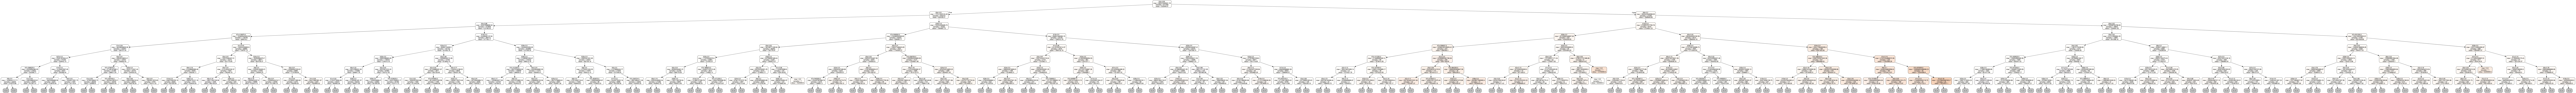

In [56]:
#Display tree:
from IPython.display import Image

Image(filename = 'graphviz.png')

In [63]:
#Build features importance:

feat_imp = {}
for feature, importance in zip(gla_data3.columns, rf.feature_importances_):
    feat_imp[feature] = importance
    
importances = pd.DataFrame.from_dict(feat_imp, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

importances.head()

Features  Gini-Importance
0        TOTAL_FLOOR_AREA         0.296850
1  driving_distance_miles         0.168389
2     NUMBER_HEATED_ROOMS         0.097743
3  NUMBER_HABITABLE_ROOMS         0.082793
4       Deprivation_Index         0.072778

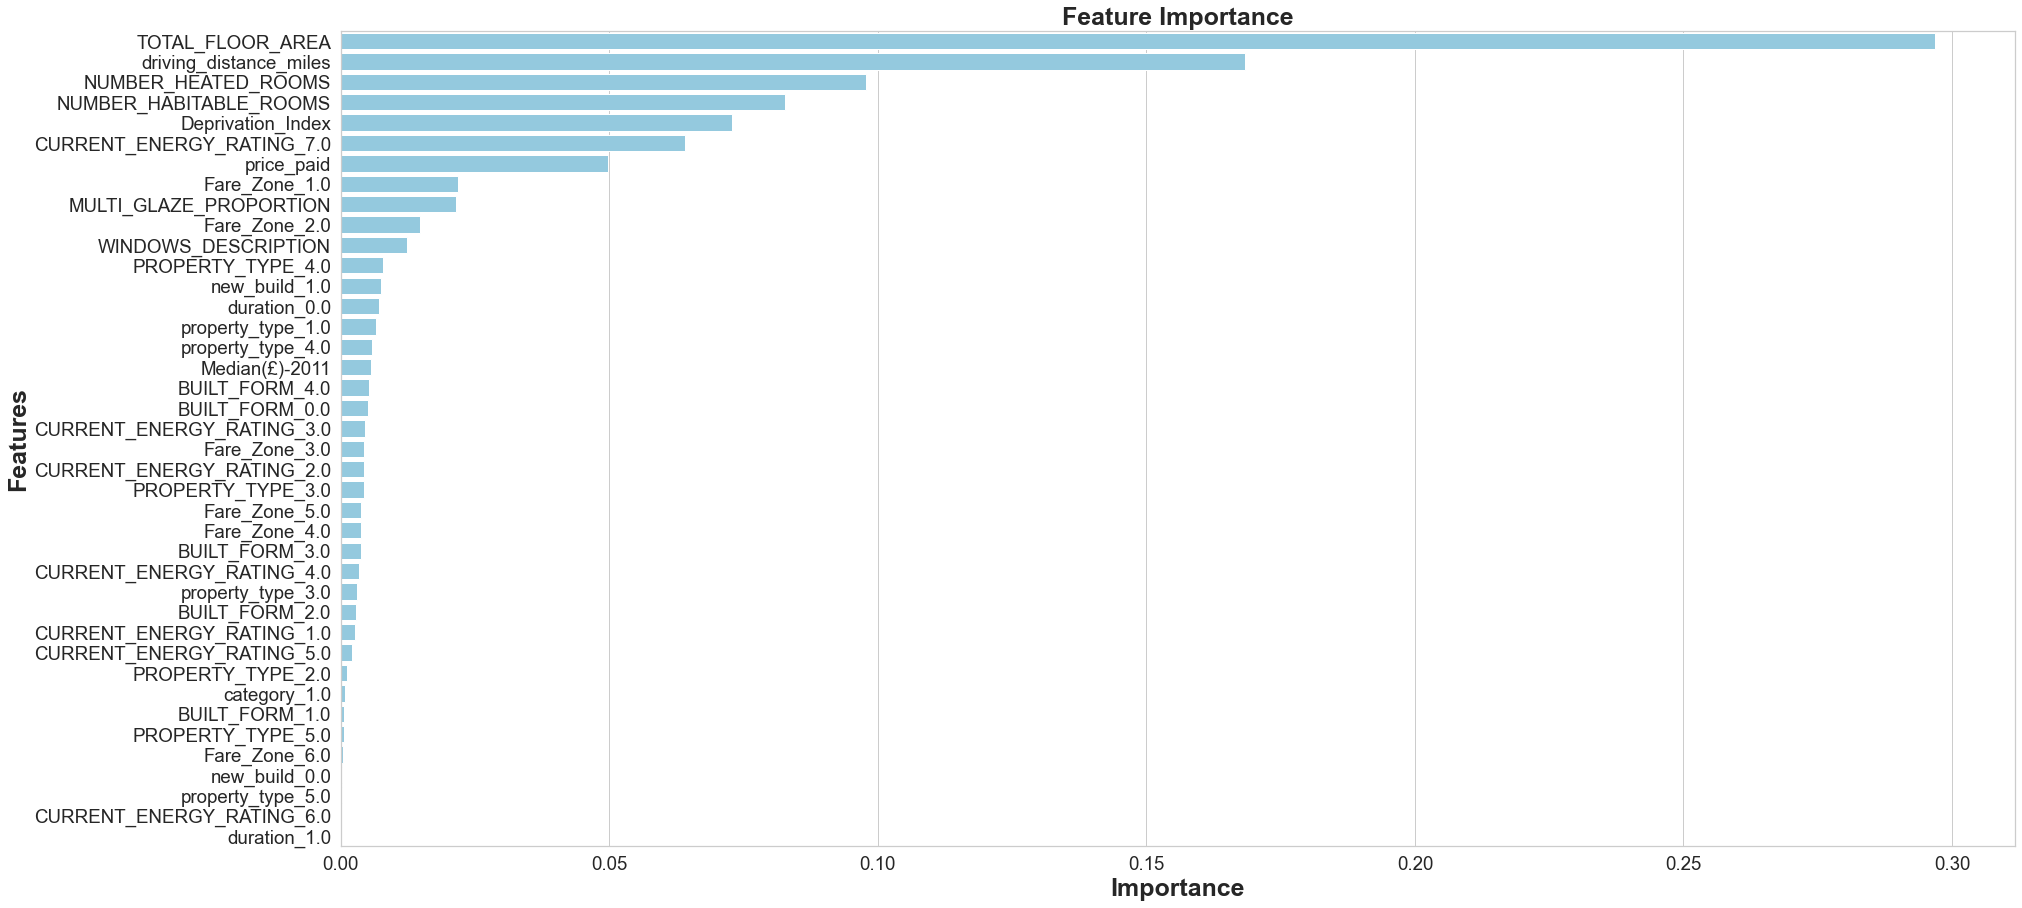

None

Features  Gini-Importance
0            TOTAL_FLOOR_AREA         0.296850
1      driving_distance_miles         0.168389
2         NUMBER_HEATED_ROOMS         0.097743
3      NUMBER_HABITABLE_ROOMS         0.082793
4           Deprivation_Index         0.072778
5   CURRENT_ENERGY_RATING_7.0         0.064119
6                  price_paid         0.049735
7               Fare_Zone_1.0         0.021902
8      MULTI_GLAZE_PROPORTION         0.021392
9               Fare_Zone_2.0         0.014825
10        WINDOWS_DESCRIPTION         0.012231
11          PROPERTY_TYPE_4.0         0.007836
12              new_build_1.0         0.007419
13               duration_0.0         0.007113
14          property_type_1.0         0.006475
15          property_type_4.0         0.005898
16             Median(£)-2011         0.005539
17             BUILT_FORM_4.0         0.005312
18             BUILT_FORM_0.0         0.004982
19  CURRENT_ENERGY_RATING_3.0         0.004478
20              Fare_Zone_3.0         0.004398
21  CURRENT_ENERGY_RATING_2.0         0.004361
22          PROPERTY_TYPE_3.0         0.004331
23              Fare_Zone_5.0         0.003792
24              Fare_Zone_4.0         0.003781
25             BUILT_FORM_3.0         0.003763
26  CURRENT_ENERGY_RATING_4.0         0.003424
27          property_type_3.0         0.003028
28             BUILT_FORM_2.0         0.002869
29  CURRENT_ENERGY_RATING_1.0         0.002649
30  CURRENT_ENERGY_RATING_5.0         0.002113
31          PROPERTY_TYPE_2.0         0.001057
32               category_1.0         0.000756
33             BUILT_FORM_1.0         0.000615
34          PROPERTY_TYPE_5.0         0.000595
35              Fare_Zone_6.0         0.000368
36              new_build_0.0         0.000145
37          property_type_5.0         0.000142
38  CURRENT_ENERGY_RATING_6.0         0.000004
39               duration_1.0         0.000000

In [64]:
#Plot Feature importance:
sns.set(font_scale = 5)
sns.set(style = 'whitegrid', color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30, 15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances,
           color = 'skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight='bold')

display(plt.show())
display(importances)

In [11]:
#Tune Random Forest: This cell is used to test best parameters

from itertools import product
n_estimators = 1500
max_features = [1, 'sqrt', 'log2']
max_depths =[None, 10, 23, 25]
for f, d in product(max_features, max_depths):
    rf = RandomForestRegressor(n_estimators=n_estimators, max_features=f,
                              max_depth=d, n_jobs=5, bootstrap=False, criterion = 'mse')
    rf.fit(X_train, y_train)
    prediciton_test = rf.predict(X=X_test)
    print('Training accuracy for max features = {} and max depth = {}, is: {}'.format(f, d, rf.score(X_train, y_train)))
    print('Testing accuracy for max features = {} and max depth = {}, is: {}'.format(f, d, rf.score(X_test, y_test)))
    print()

Training accuracy for max features = sqrt and max depth = None, is: 0.9992146241467025
Testing accuracy for max features = sqrt and max depth = None, is: 0.8409944600430401

Training accuracy for max features = sqrt and max depth = 23, is: 0.9971006558071734
Testing accuracy for max features = sqrt and max depth = 23, is: 0.8405473581149712

Training accuracy for max features = sqrt and max depth = 25, is: 0.9983488026203076
Testing accuracy for max features = sqrt and max depth = 25, is: 0.8403839741853372

Training accuracy for max features = log2 and max depth = None, is: 0.9992146035548441
Testing accuracy for max features = log2 and max depth = None, is: 0.837017090493513

Training accuracy for max features = log2 and max depth = 23, is: 0.9964294360750264
Testing accuracy for max features = log2 and max depth = 23, is: 0.835917274921968

Training accuracy for max features = log2 and max depth = 25, is: 0.998036544679191
Testing accuracy for max features = log2 and max depth = 25,